## Import Repositories

In [28]:
import sys
print(sys.executable)
import scanpy as sc
from cnmf import cNMF

/opt/apps/rhel9/Anaconda3-2024.02/bin/python


In [ ]:
import scanpy as sc
import pandas as pd
import torch 
import pyensembl
from sklearn.decomposition import NMF, PCA
from cnmf import cNMF
import numpy as np
import functions as fun
import tqdm as tqdm

/hpc/home/zy231/miniconda3/envs/h5ad/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
adata = sc.read_h5ad("data/adata_ge1.h5ad")

In [26]:
adata.obs.columns

Index(['library_name', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'GEX_UMI_count', 'n_genes',
       'MT_count', 'MT_frac', 'GEX_high_quality_stringent',
       'GEX_high_quality_loose', 'gRNA_assignment_count', 'has_guide_bin'],
      dtype='object')

## Running cNMF

##### NMF

Running new results: 

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

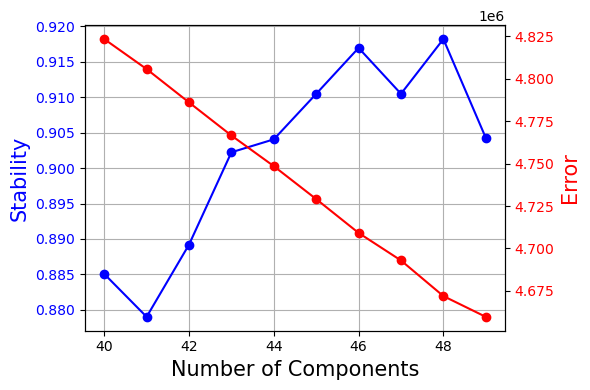

In [ ]:
cnmf_obj = cNMF(output_dir="cnmf_run", name="")
cnmf_obj.prepare(counts_fn="outfiles/adata_ge1.h5ad", components=np.arange(40,50), n_iter=100, seed=14)
cnmf_obj.factorize(worker_i=0, total_workers=1)
cnmf_obj.combine()
cnmf_obj.k_selection_plot()

Load prior data: 
NOTE: 
- largerun2 is run of arange(45,65)
- 4050run is run of 40 to 50 range
- sparserun is run of [3,5,10,15,30,45,60,80,100]


/hpc/home/zy231/.local/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


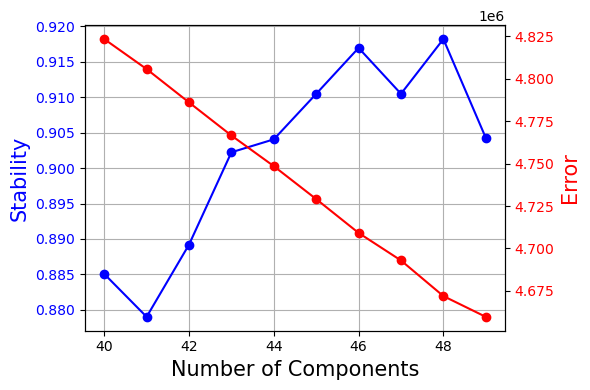

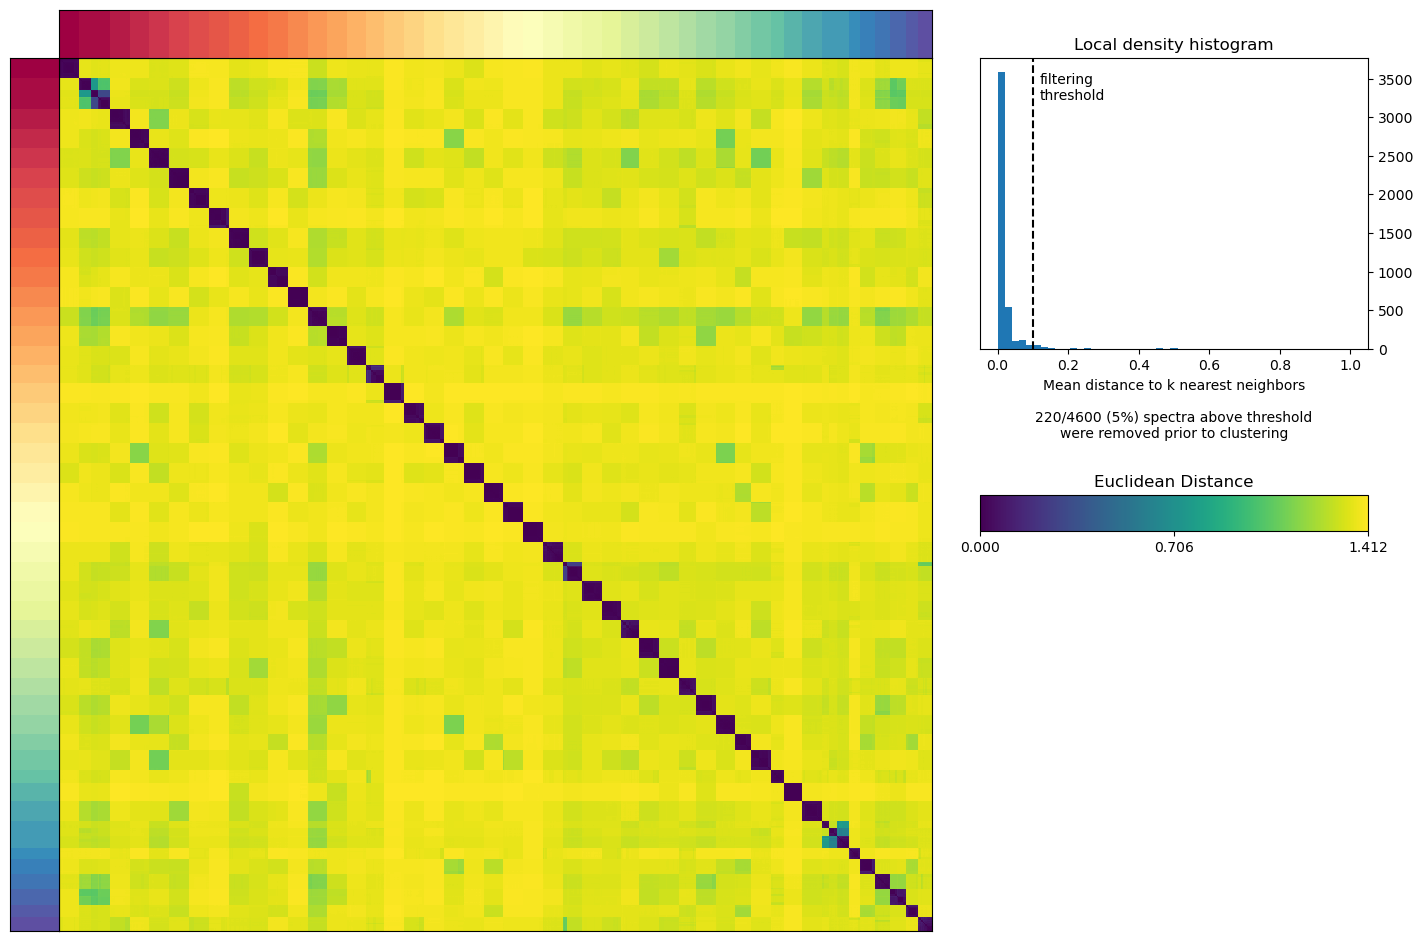

In [32]:
cnmf_obj = cNMF(output_dir="results/cnmf_run", name="4050run")

# You can now continue *exactly* where you left off.
# For example, you can immediately make the plot again (it will be instant):
cnmf_obj.k_selection_plot()

# Or you can move to the next step (e.g., if you picked k=46):
cnmf_obj.consensus(k=46, density_threshold=0.1)

# And then load your results
usage, spectra_scores, spectra_tpm, top_genes = cnmf_obj.load_results(K=46, density_threshold=0.1)

In [45]:
#for MAGMA
'''np.save("program46.npy",spectra_scores)
adata.var['gene_ids'].to_csv("genes_aligned.txt", index =False, header=False)'''

(38607, 46)

Save data to adata file

In [5]:
'''cnmf_obj.save_results_to_anndata(
    adata=adata,
    K=chosen_k,
    density_threshold=density_threshold,
    key='cnmf'  # This prefix will be used in adata.obsm, etc.
)'''


print("Adding cNMF results to AnnData object...")

# 1. Add the cell usage matrix to .obsm (per-cell data)
# We reindex to make sure the cells match your current adata object
adata.obsm['cnmf_usages'] = usage.reindex(adata.obs.index)

# 2. Add the gene spectra (loadings) to .varm (per-gene data)
# We reindex to make sure the genes match your current adata object
adata.varm['cnmf_spectra_scores'] = spectra_scores.reindex(adata.var.index)
adata.varm['cnmf_spectra_tpm'] = spectra_tpm.reindex(adata.var.index)

# 3. Add the top genes data to .uns (unstructured data)
adata.uns['cnmf_top_genes'] = top_genes

print("Successfully saved results to adata.")
print(adata)

Adding cNMF results to AnnData object...
Successfully saved results to adata.
AnnData object with n_obs × n_vars = 3374 × 38607
    obs: 'library_name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'GEX_UMI_count', 'n_genes', 'MT_count', 'MT_frac', 'GEX_high_quality_stringent', 'GEX_high_quality_loose', 'gRNA_assignment_count', 'has_guide_bin'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'library_name_colors', 'cnmf_top_genes'
    obsm: 'cnmf_usages'
    varm: 'cnmf_spectra_scores', 'cnmf_spectra_tpm'


In [22]:
adata.uns['cnmf_top_genes']

,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
0,TNNI1,CTNNA3,FAM111B,NUTM2F,LORICRIN,CENPF,NOS2,LINC02406,ENSG00000254306,ENSG00000289020,...,TLE1-DT,ENSG00000251055,SPRR2F,ENSG00000286494,ENSG00000287233,TMEM196,ENSG00000253484,ENSG00000287633,ENSG00000270557,CSNKA2IP
1,ATP5MC3,RYR2,BRCA2,ENSG00000256542,PROK2,CENPE,ENSG00000286806,ENSG00000229882,ENSG00000241728,ENSG00000259620,...,LINC00560,ENSG00000229395,NPY,ENSG00000286525,C8orf90,ENSG00000287051,ENSG00000260021,ENSG00000249318,NRSN1,ENSG00000250137
2,MYL4,CACNA1C,CDC6,FOXD2,ENSG00000260390,FAM83D,ENSG00000259296,AKAIN1,ENSG00000264514,ENSG00000223542,...,ENSG00000227920,CLCA1,PLPP4,ENSG00000287641,ENSG00000289332,S100A5,LINC01896,LNCPOIR,ENSG00000288040,ENSG00000262714
3,FABP3,ERBB4,BLM,ENSG00000256273,TRIM31,ASPM,ENSG00000240777,ENSG00000273321,ENSG00000267007,GIMAP7,...,ENSG00000254024,ENSG00000243486,EMILIN3,OR8K3,LINC02261,ISLR,ENSG00000253130,ENSG00000226919,ENSG00000287054,FCGR2A
4,CHCHD10,SLC8A1,CENPK,AWAT1,ENSG00000251339,CEP55,LINC00398,ENSG00000286227,SPANXD,OR2B6,...,ENSG00000286348,ENSG00000243861,ALKAL2,RBP3,ENSG00000273098,IL24,ENSG00000256884,ENSG00000288846,LINC01791,NKG7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HSPB7,JAZF1,GLYATL2,RELB,ENSG00000272843,FOXM1,ENSG00000276573,PASD1,ENSG00000287169,LINC02906,...,ENSG00000285904,ENSG00000242753,CD200,ENSG00000234149,ENSG00000251412,CAMK1G,ENSG00000223901,KCTD16,HNRNPA1L2,ENSG00000234261
96,MYL9,ENSG00000260658,ENSG00000290606,LONRF3,LINC00216,ENSG00000249084,THRB,KCNMB2-AS1,FBP1,ITGA4,...,ENSG00000286581,HLA-DRA,CLCF1,LINC00592,ENSG00000251600,RFX8,SPAG16-DT,ENSG00000260111,RORB,PHEX
97,RPL11,UTRN,RTKN2,YRDC,ENSG00000277511,GGTLC3,SLC8A2,ENSG00000263105,MUCL3,ENSG00000274929,...,ENSG00000230051,LINC01702,CAMK2N1,LINC02955,ENSG00000287844,NETO2,NUAK2,YWHAEP7,ENSG00000286074,LINC03004
98,NDUFB9,RASAL2,ENSG00000291224,SNHG7,SNHG3,TYMS,ZNF649-AS1,PHEX,VTN,ENSG00000253407,...,LINC02929,LINC02458,RAB38,ENSG00000289605,ENSG00000287032,COL6A6,ENSG00000244268,NOTUM,CDC37L1-DT,TPH2
